In [149]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [150]:
airline = pd.read_csv('./customer_airways_data.csv', encoding='latin1')

In [151]:
reviews = pd.read_csv('./cleaned-reviews.csv', encoding='latin1')

#### Filtramos cleaned-reviews por pais y porcentaje de puntaje

In [152]:
reviews = reviews.groupby('country')['rates'].mean()
reviews

country
Argentina               7.666667
Australia               5.414966
Austria                 4.900000
Bahrain                 1.000000
Barbados                9.000000
                          ...   
Ukraine                 8.000000
United Arab Emirates    3.750000
United Kingdom          4.899769
United States           4.351801
Vietnam                 3.000000
Name: rates, Length: 69, dtype: float64

#### Cruzamos datos con airline_data

In [153]:
airline_filter = airline.merge(reviews, left_on='booking_origin', right_on='country', how='inner')
airline_filter

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,rates
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,4.545455
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,4.545455
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,4.941176
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,4.545455
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,4.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48920,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,5.414966
48921,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,5.414966
48922,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,5.414966
48923,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,5.414966


#### Filtramos los paises que otorgan puntajes aprobados (mayores iguales a siete)

In [154]:
airline_filter = airline_filter.loc[airline_filter.rates >=7,:]
airline_filter.reset_index()

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,rates
0,539,2,Internet,RoundTrip,42,21,9,Sun,AKLKUL,Laos,0,0,0,8.83,0,10.000000
1,671,2,Internet,RoundTrip,49,52,9,Sun,AKLKUL,Laos,1,0,0,8.83,0,10.000000
2,1049,1,Internet,RoundTrip,85,33,17,Sun,AKLKUL,Oman,1,0,1,8.83,0,10.000000
3,1861,1,Internet,RoundTrip,45,29,3,Mon,AKLKUL,Oman,1,0,0,8.83,0,10.000000
4,1902,3,Internet,RoundTrip,255,23,19,Sat,AKLKUL,Ukraine,0,0,0,8.83,0,8.000000
5,3628,2,Internet,RoundTrip,29,19,9,Sat,CGKDEL,Oman,0,0,0,5.52,0,10.000000
6,7926,1,Mobile,RoundTrip,55,29,16,Mon,DELDPS,Argentina,1,0,0,5.52,0,7.666667
7,8037,1,Internet,RoundTrip,19,66,8,Fri,DELMEL,Oman,0,0,0,8.83,0,10.000000
8,8885,1,Internet,RoundTrip,56,30,15,Tue,DMKMEL,Laos,1,0,0,8.83,0,10.000000
9,9275,1,Internet,RoundTrip,69,23,11,Fri,DMKOOL,Laos,1,1,0,8.83,0,10.000000


In [162]:
airline_filter.booking_origin.value_counts()

booking_origin
Laos         25
Oman          9
Argentina     6
Ukraine       5
Name: count, dtype: int64

Text(0.5, 1.0, 'Paises con promedio de puntaje aprobado')

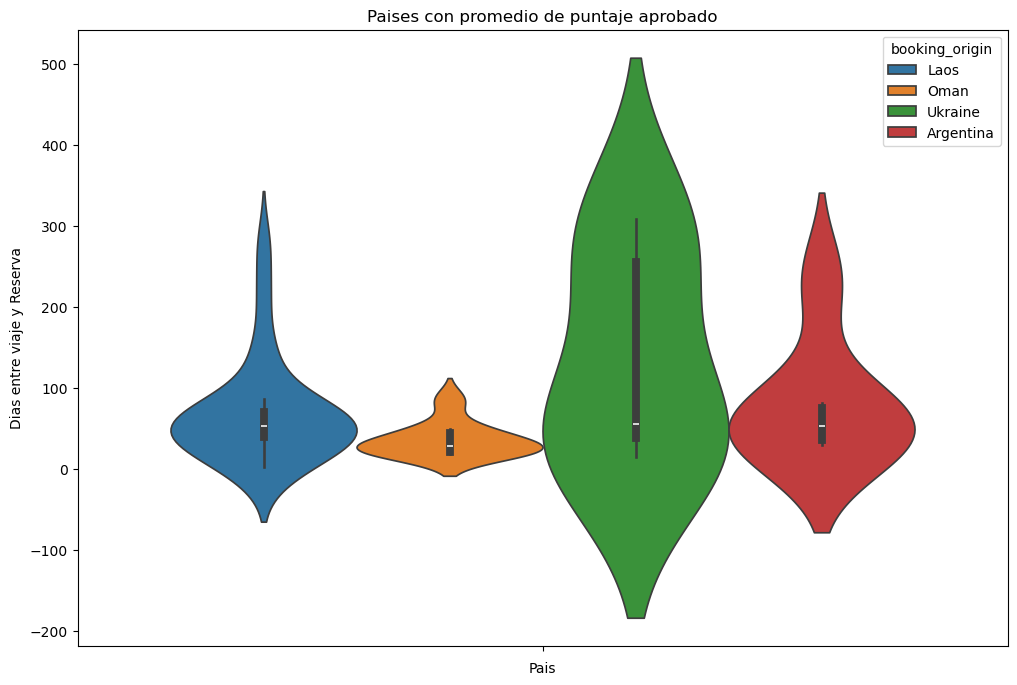

In [190]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=airline_filter,y="purchase_lead",hue="booking_origin")


plt.xlabel("Pais")
plt.ylabel("Dias entre viaje y Reserva")
plt.title("Paises con promedio de puntaje aprobado")